In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal
from scipy.interpolate import CubicSpline
import mpl_axes_aligner 
import seaborn as sns
import csv

# sns.set_theme(style="darkgrid")

%matplotlib widget

# data=pd.read_csv("not_moving_trot.csv")
# table=data[7500:]

#files are named gait-speed-period
# filename="trot-1-0.4"
filename="trot-1-0.2"
data=pd.read_csv(filename+".csv")
csv_file = "data/"+filename+'_data.csv'

table=data[-20001:-1]
print(len(table.index))
table.reset_index(drop=True, inplace=True)

holder=[]
for i in range(len(table.index)):
    holder.append(table.qd00[i]*table.t00[i])
table.insert(len(table.columns), "p00", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd01[i]*table.t01[i])
table.insert(len(table.columns), "p01", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd02[i]*table.t02[i])
table.insert(len(table.columns), "p02", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd10[i]*table.t10[i])
table.insert(len(table.columns), "p10", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd11[i]*table.t11[i])
table.insert(len(table.columns), "p11", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd12[i]*table.t12[i])
table.insert(len(table.columns), "p12", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd20[i]*table.t20[i])
table.insert(len(table.columns), "p20", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd21[i]*table.t21[i])
table.insert(len(table.columns), "p21", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd22[i]*table.t22[i])
table.insert(len(table.columns), "p22", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd30[i]*table.t30[i])
table.insert(len(table.columns), "p30", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd31[i]*table.t31[i])
table.insert(len(table.columns), "p31", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd32[i]*table.t32[i])
table.insert(len(table.columns), "p32", holder, True)

table


20000


,time,iterations,bodyOrientation0,bodyOrientation1,bodyOrientation2,bodyOrientation3,vb0,rpy0,omegab0,omega0,...,p02,p10,p11,p12,p20,p21,p22,p30,p31,p32
0,20.450,10225,0.999929,0.001791,-0.000310,-0.011756,0.969041,0.003589,0.004888,0.010955,...,-0.786492,0.031356,-0.750162,2.148822,0.041322,-0.460009,5.120743,-0.032065,26.318592,0.428426
1,20.451,10226,0.999929,0.001792,-0.000176,-0.011744,0.967519,0.003588,-0.001067,0.005205,...,5.273001,0.019909,-0.759062,2.204104,0.056860,-0.455723,5.318849,-0.032242,26.170896,5.574417
2,20.452,10226,0.999930,0.001823,-0.000049,-0.011728,0.966042,0.003648,0.059707,0.065655,...,9.656759,0.135855,-0.761459,2.432396,0.470674,-0.367967,11.111570,-0.093818,21.416181,10.279650
3,20.453,10227,0.999930,0.001835,0.000086,-0.011713,0.965013,0.003668,0.020061,0.026396,...,13.802145,0.057968,-0.775857,2.398206,0.014249,-0.319782,6.470784,-0.091806,20.915195,14.369037
4,20.454,10227,0.999930,0.001847,0.000222,-0.011700,0.963952,0.003689,0.021273,0.027640,...,17.530681,0.059267,-0.826778,2.478025,0.012197,-0.914357,6.462116,-0.133880,15.480789,18.074427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40.445,20222,0.995664,0.001493,-0.001550,-0.092993,0.977308,0.003262,-0.002319,0.042615,...,-25.490173,0.046875,1.598811,0.049248,0.015049,-0.826704,5.841586,-0.008166,19.066142,-22.803594
19996,40.446,20223,0.995666,0.001507,-0.001423,-0.092980,0.976038,0.003265,0.003008,0.050055,...,-21.215891,0.060653,1.599746,0.102283,0.007152,-0.833432,6.041604,-0.022145,19.631290,-18.737539
19997,40.447,20223,0.995667,0.001526,-0.001290,-0.092966,0.974676,0.003279,0.014430,0.063838,...,-19.923425,0.084158,1.281372,0.147288,-0.014182,-1.024825,6.196616,-0.017902,21.317185,-17.204807
19998,40.448,20224,0.995669,0.001544,-0.001151,-0.092952,0.973355,0.003288,0.008805,0.060513,...,-15.128639,0.072500,1.259597,0.167371,0.003695,-1.009483,6.405566,-0.023724,21.630690,-12.675109


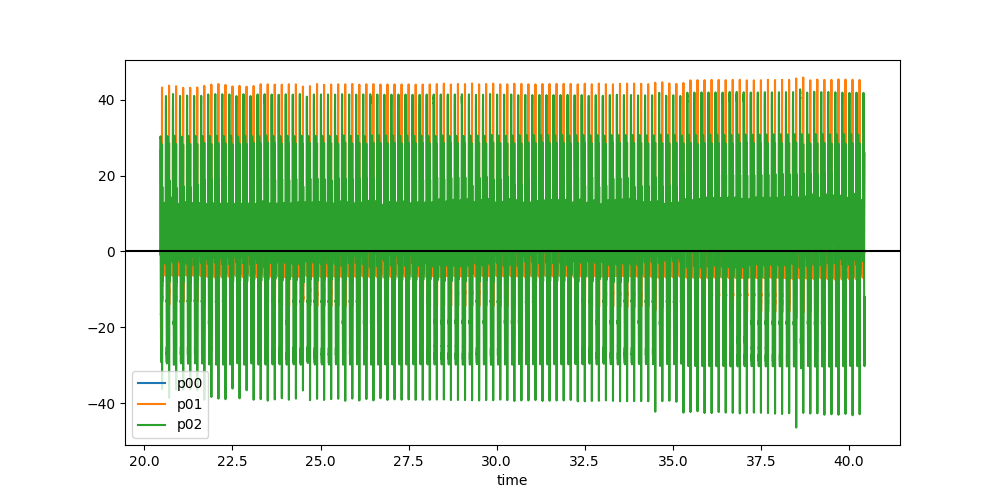

In [23]:
plt.close()
plt.figure(figsize=(10,5))
ax = plt.gca()

# table.plot( x = 'time' , y = 'q01', ax = ax )
table.plot( x = 'time' , y = 'p00', ax = ax )
table.plot( x = 'time' , y = 'p01', ax = ax )
table.plot( x = 'time' , y = 'p02', ax = ax )

# table.plot( x = 'time' , y = 'p10', ax = ax )
# table.plot( x = 'time' , y = 'p11', ax = ax )
# table.plot( x = 'time' , y = 'p12', ax = ax )

# table.plot( x = 'time' , y = 'p20', ax = ax )
# table.plot( x = 'time' , y = 'p21', ax = ax )
# table.plot( x = 'time' , y = 'p22', ax = ax )

# table.plot( x = 'time' , y = 'p30', ax = ax )
# table.plot( x = 'time' , y = 'p31', ax = ax )
# table.plot( x = 'time' , y = 'p32', ax = ax )

# table.plot( x = 'time' , y = 'p02', ax = ax )
# table.plot( x = 'time' , y = 'qd00', ax = ax )
# table.plot( x = 'time' , y = 't00', ax = ax )
# table.plot( x = 'time' , y = 't01', ax = ax )

plt.axhline(y=0.0, color='black', linestyle='-')

plt.show()

In [24]:
# Define start and end points
start = 0
end = 502

# Define interval
interval = 1

# Create the list
number_list = [start + i * interval for i in range(502)]

# Print the lis
print(len(number_list))
range_values = table.loc[5043:5544, 'p00'].tolist()
range_values1 = table.loc[5043:5544, 'p01'].tolist()
range_values2 = table.loc[5043:5544, 'p02'].tolist()
table2=table[5043:5544]
len(range_values)

502


502

In [47]:
a=[20 + i * 1 for i in range(25)]
b=range_values[20:44]
len(a)

25

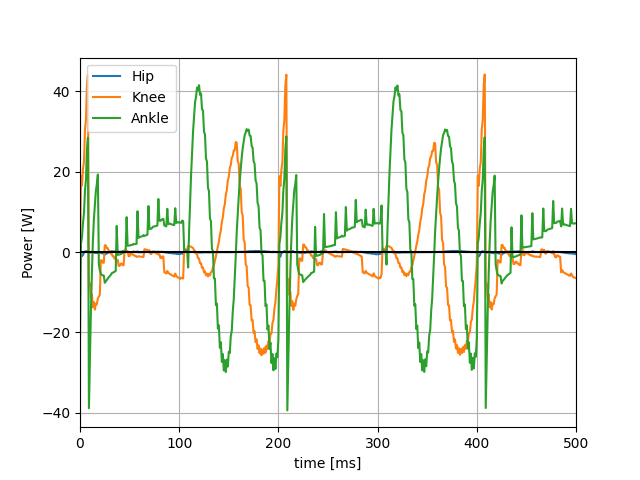

In [25]:
plt.close()
# plt.figure(figsize=(10,5))
plt.plot(number_list, range_values,label = "Hip")
plt.plot(number_list, range_values1,label = "Knee")
plt.plot(number_list, range_values2,label = "Ankle")
plt.ylabel('Power [W]')
# plt.ylabel('Regenerative Window [ms]')
plt.xlabel('time [ms]')
# plt.plot(xpoints2, ypoints2,label = "line 2")
# plt.plot(xpoints3, ypoints3,label = "line 3")
# print(np.amin(knee_rad_vel))
plt.xlim([0,500])
plt.axhline(0, color='black', linestyle='-')


plt.legend()
fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.grid(True)
# mask = (number_list >= 20) & (number_list <= 45)  
# plt.fill_between([22 + i * 1 for i in range(25)], range_values[22:47], color='crimson', alpha=0.4)
# plt.fill_between([272 + i * 1 for i in range(26)], range_values[272:298], color='crimson', alpha=0.3)
# plt.fill_between([370 + i * 1 for i in range(22)], range_values[370:392], color='crimson', alpha=0.3)
plt.savefig('data/0.2-data.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [73]:
def calculate_areas(start,end):
    positive_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    negative_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    time=0.001
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    for jj in range(len(columns)):
        for i in range(end-start):
            first_area=0.0
            second_area=0.0
            # print(table.p01[i+start],"  ",table.p01[i+start+1])
            if(table2.loc[i+start,columns[jj]]>=0.0 and table2.loc[i+start+1,columns[jj]]>=0.0):
                positive_area[jj]+=(table2.loc[i+start,columns[jj]]+table2.loc[i+start+1,columns[jj]])*time/2
            elif(table2.loc[i+start,columns[jj]]<0.0 and table2.loc[i+start+1,columns[jj]]<0.0):
                negative_area[jj]+=(table2.loc[i+start,columns[jj]]+table2.loc[i+start+1,columns[jj]])*time/2
            else:
                intersect=table2.loc[i+start,columns[jj]]/(table2.loc[i+start,columns[jj]]-table2.loc[i+start+1,columns[jj]])*time
                first_area=table2.loc[i+start,columns[jj]]*intersect/2
                second_area=table2.loc[i+start+1,columns[jj]]*(time-intersect)/2
                if(first_area >=0.0):
                    positive_area[jj]+=first_area
                    negative_area[jj]+=second_area
                else:
                    positive_area[jj]+=second_area
                    negative_area[jj]+=first_area
    return positive_area,negative_area

In [77]:

table2.reset_index(drop=True, inplace=True)
table2

,time,iterations,bodyOrientation0,bodyOrientation1,bodyOrientation2,bodyOrientation3,vb0,rpy0,omegab0,omega0,...,p02,p10,p11,p12,p20,p21,p22,p30,p31,p32
0,23.204,11602,0.999942,0.001397,-0.002463,-0.010372,1.02927,0.002845,1.30369,1.32972,...,0.756642,0.046706,1.208300,-0.578459,-0.164923,0.800393,-0.706334,2.625267,2.579611,18.035140
1,23.205,11603,0.999943,0.002059,-0.001814,-0.010365,1.03070,0.004155,1.31088,1.33772,...,0.659198,0.048389,1.553819,0.044951,-0.188635,1.162919,-0.094232,2.655256,2.999938,18.181385
2,23.206,11603,0.999942,0.002701,-0.001160,-0.010359,1.03106,0.005427,1.27123,1.29831,...,0.624174,0.070584,2.166734,0.485955,-0.208054,1.758744,0.582847,2.951264,7.357312,20.874373
3,23.207,11604,0.999941,0.003361,-0.000480,-0.010353,1.03330,0.006732,1.30594,1.33409,...,0.453850,0.054266,2.493016,0.878088,-0.219755,2.100555,0.827494,2.440922,4.482733,18.177220
4,23.208,11604,0.999938,0.004022,0.000217,-0.010348,1.03493,0.008040,1.30705,1.33591,...,0.350497,0.061453,3.218527,1.479279,-0.234633,2.787726,1.401867,2.441768,4.814932,18.453301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,23.600,11800,0.999931,-0.000913,-0.005091,-0.010518,1.02110,-0.001719,1.20621,1.22828,...,1.092429,0.035620,-0.493291,-2.852821,-0.121582,-0.999647,-2.938660,2.517819,0.261366,17.632040
397,23.601,11801,0.999934,-0.000299,-0.004544,-0.010508,1.02270,-0.000503,1.21600,1.23883,...,0.971090,0.037399,0.020288,-2.211174,-0.134628,-0.465505,-2.306891,2.517130,0.618746,17.786751
398,23.602,11801,0.999937,0.000319,-0.003979,-0.010499,1.02422,0.000722,1.22509,1.24869,...,0.847989,0.039569,0.390627,-1.794136,-0.148073,0.082290,-1.892220,2.540732,1.020473,17.605124
399,23.603,11802,0.999939,0.000942,-0.003394,-0.010490,1.02559,0.001955,1.23319,1.25760,...,0.719581,0.043320,0.727231,-1.165818,-0.162800,0.413668,-1.272305,2.540441,1.421863,17.762321


In [83]:
# calculate_areas(22,47)
# calculate_areas(272,298)
calculate_areas(0,400)

([0.009601427354453976,
  0.9531298783522256,
  1.217390301727853,
  0.012439046289416994,
  0.9578754298079417,
  1.1931586934236615,
  0.1281794261277349,
  1.041466951727751,
  1.2461596196818678,
  0.13659207390061573,
  0.996664353938354,
  1.213729679952252],
 [-0.1559085609101738,
  -0.8240380175503176,
  -1.2327031803415651,
  -0.14854235088510181,
  -0.7961509063879858,
  -1.1892808578472422,
  -0.029180542733246325,
  -0.7923528715694231,
  -1.2501723119426433,
  -0.02685611468211203,
  -0.8225392030599812,
  -1.2200166825980372])

In [85]:
a=-0.4711123459220599+-0.12338591582167999+-0.113180502399525
b=-1.1892808578472422
print(a)
print(b)
print(a/b)

-0.7076787641432649
-1.1892808578472422
0.5950476369595811
